## Ejercicio 9.4: difusión térmica en la corteza terrestre

Un ejemplo clásico de un problema de difusión con una condición límite variable en el tiempo es la difusión de calor en la corteza terrestre, una temperatura de la superficie que varía con las estaciones. Suponga que la temperatura media diaria en un punto particular de la superficie varía como:

$$ T_0(t)=A+BSen \left(\frac{2 \pi t}{\tau} \right) $$

donde $ \tau = 365 días$, $A = 10 ° C$ y $B = 12 ° C$. A una profundidad de $20 m$ debajo de la superficie, casi todas las variaciones anuales de temperatura se eliminan y la temperatura es, en buena aproximación, una constante de $11 ° C$ (que es más alta que la temperatura media de la superficie de $10 ° C$; la temperatura aumenta con la profundidad , debido al calentamiento del núcleo caliente del planeta). La difusividad térmica de la corteza terrestre tiene algo de un lugar a otro, pero para nuestros propósitos la trataremos como constante con un valor $D = 0.1  m^2 Día^{-1}$.

Escriba un programa, o modifique uno de los que se dan en el capítulo, para calcular el perfil de temperatura de la corteza en función de una profundidad de hasta $20 m$ y un tiempo de hasta $10 años$, comience con una temperatura en todas partes igual a $10 ° C$, excepto en la superficie y en el punto más profundo, elija valores para el número de puntos de la cuadrícula y el paso de tiempo $h$, luego ejecute su programa durante los primeros nueve años simulados, para permitir que se asiente hacia abajo en cualquier patrón que alcance. Luego, para el décimo y último año, grafique cuatro perfiles de temperatura tomados a intervalos de $3 meses$ en un solo gráfico para ilustrar cómo cambia la temperatura en función del tiempo de profundidad.

In [11]:
from numpy import empty
from pylab import plot,xlabel,ylabel,show,sin,imshow,grid,title
from math import pi
import matplotlib.pyplot as plt

Text(0, 0.5, 'Temperatura')

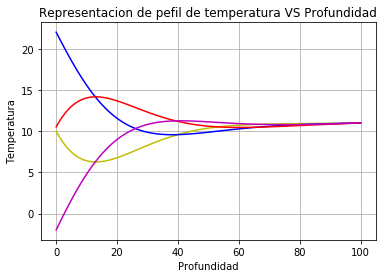

In [14]:
#Constantes
P = 20              #Profundidad en metros
D = 0.1             #Difusividad Termica
N = 100             #divisiones
a = P/N             #tamaño de divisiones de profundidad
h = 0.01            #paso de tiempo
epsilon = h/100

A = 10      # °C
B = 12      # °C
tau = 365   # días
def T0(t):
    return A + B*sin(2*pi*t/tau)   # variacion de la temperatura media diaria

tmin = 365*9            #tiempo en los primeros 9 años
t1 = tmin               #primer intervalos 
t2 = tmin + 90          #segundo intervalos 
t3 = t2 + 90            #tercer intervalos 
t4 = t3 + 90            #cuarto intervalos 
tend = t4 + epsilon

#Creando arrays
T = empty(N+1,float)
T[1:N] = 10
Tp = empty(N+1,float)

#Bucle Principal
t = 0.0
c = h*D/(a*a)
while t<tend:
    
    #Calcular los nuevos valores de T
    T[0] = T0(t)
    T[N] = 11
    for i in range (1,N):
        Tp[i] = T[i] + c*(T[i+1]+T[i-1]-2*T[i])
    T,Tp = Tp,T
    t += h
    
    #Hacer grafico en los tiempos dados
    if abs(t-t1)<epsilon:        #primer pefil de temperatura
        plot(T,'y')
    if abs(t-t2)<epsilon:        #segundo pefil de temperatura
        plot(T,'b')
    if abs(t-t3)<epsilon:        #tercer pefil de temperatura
        plot(T,'r')
    if abs(t-t4)<epsilon:        #cuarto pefil de temperatura
        plot(T,'m')

plt.title('Representacion de pefil de temperatura VS Profundidad')
grid("on")
xlabel("Profundidad")
ylabel("Temperatura")